In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))


import json
from utils import (
    get_latest_experiments,
    aggregate_metrics,
    plot_all_metrics,
    plot_class_performances,
    plot_metric_comparison,
    permutation_test,
    plot_permutation_test_distribution,
    plot_permutation_anova_distribution,
    permutation_anova ,  
    METRIC_FILES
)

BASE_DIR = "../../local_experiments/retr_test_backone_skin-cancer-splitted"

In [2]:
# Specify a list of experiment folder names.
# Example usage:
#   - specific_experiments = []             -> process the latest experiment for each type.
#   - specific_experiments = ["exp1_folder"]  -> process only that experiment.
#   - specific_experiments = ["exp1_folder", "exp2_folder"] -> process multiple experiments.
specific_experiments = ['uni_foundation_pathology_2025-04-12_06-52-38']  # Change as needed; empty list means "use latest per experiment type"
specific_experiments = []  # Change as needed; empty list means "use latest per experiment type"

# Retrieve the experiments based on the provided filter.
latest_experiments = get_latest_experiments(BASE_DIR, specific_experiments)

# if not latest_experiments:
#     print("No experiments found.")
# else:
#     # Iterate over each experiment type and process.
#     for exp_type, exp_info in latest_experiments.items():
#         # Aggregate the compiled metrics from the experiment folder.
#         aggregated = aggregate_metrics(exp_info["path"])
#         # Plot all available metrics (accuracy, recall, map, precision)
#         plot_all_metrics(aggregated, exp_type)


File not found: ../../local_experiments/retr_test_backone_skin-cancer-splitted/phikon2_skin-cancer-splitted_2025-05-26_16-50-17/map_at_k_results.json


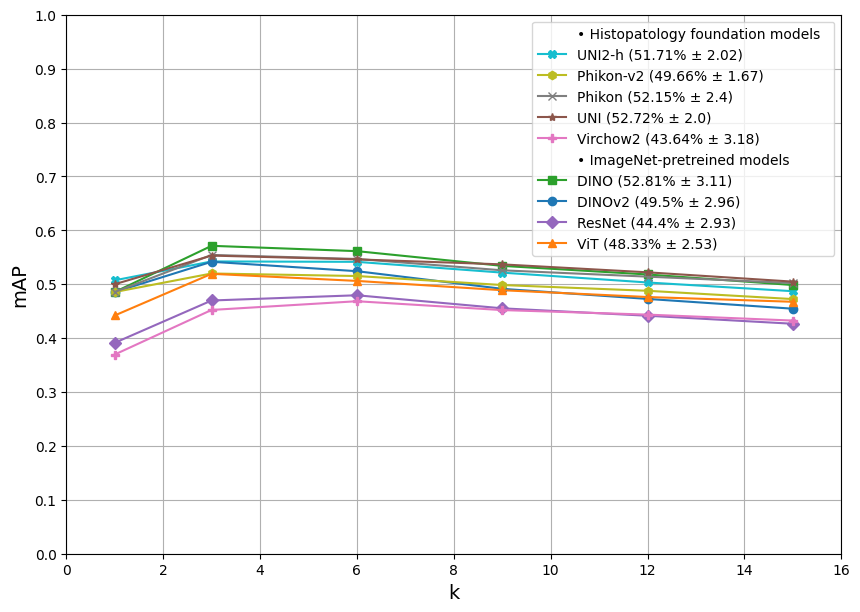

In [3]:
plot_metric_comparison(
        "mAP", 
        latest_experiments,
        legend_location='upper right',
        save_as="skin_cancer_pretreined",
    )

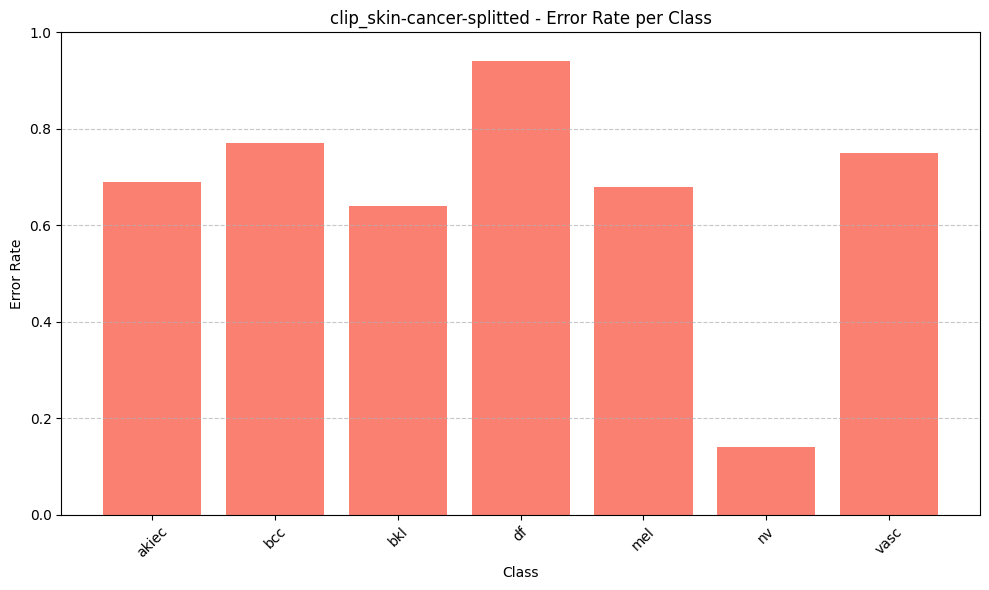

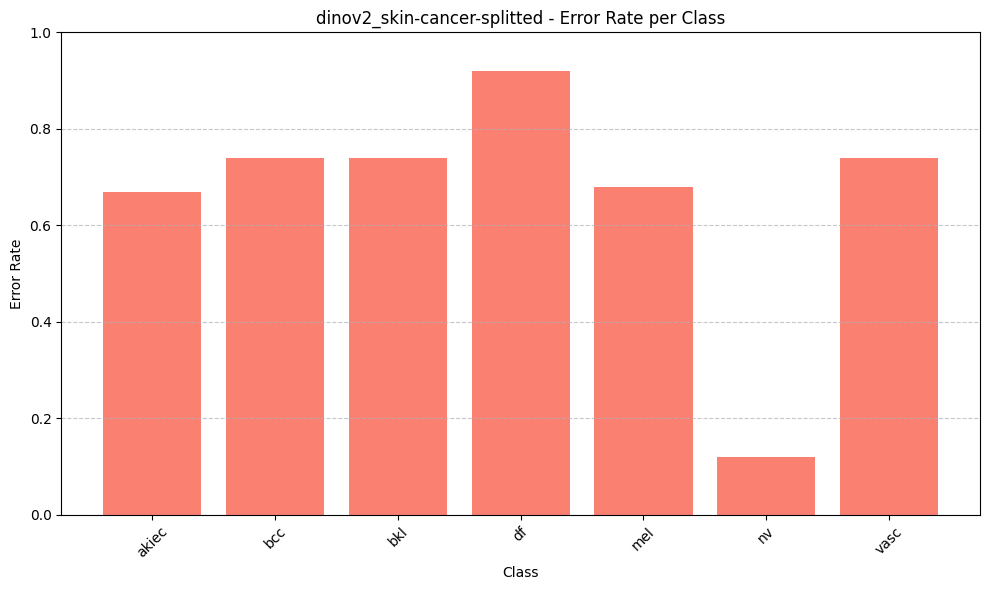

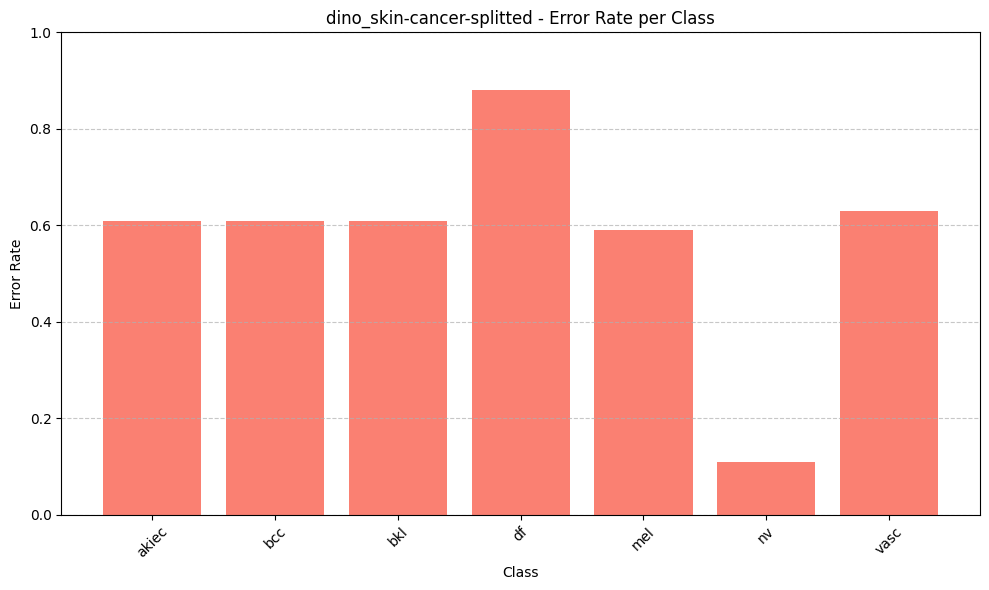

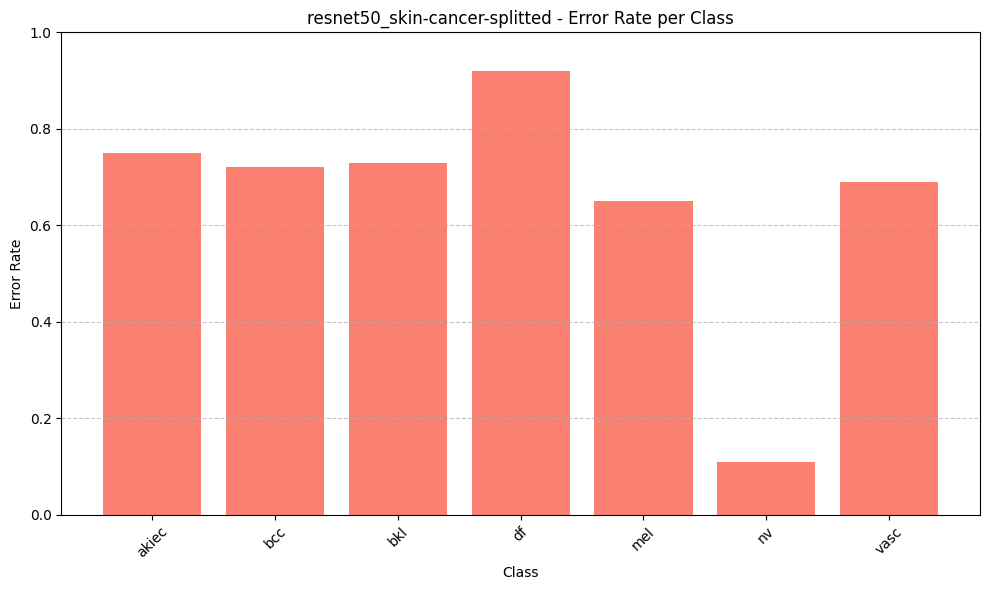

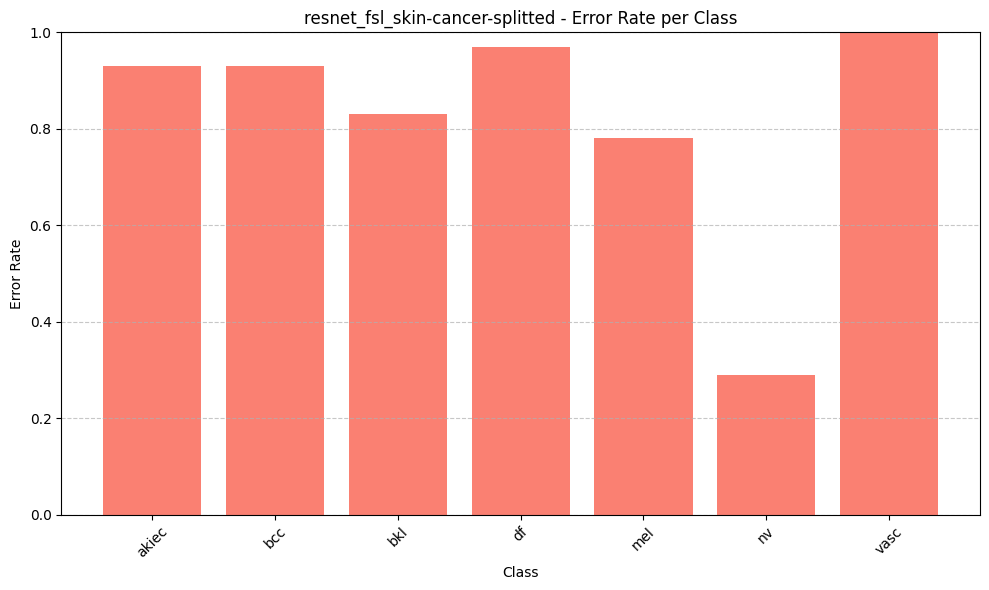

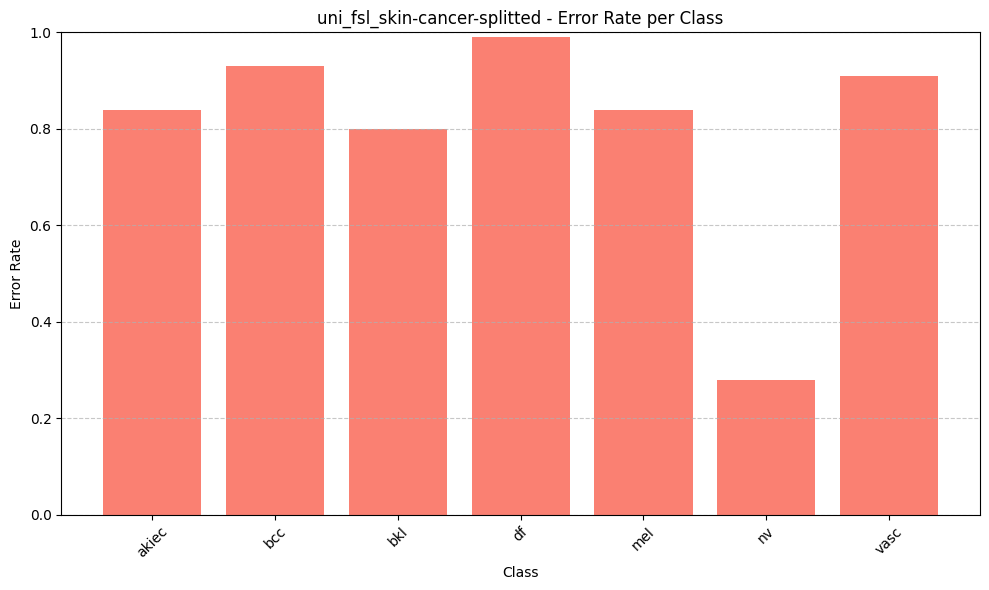

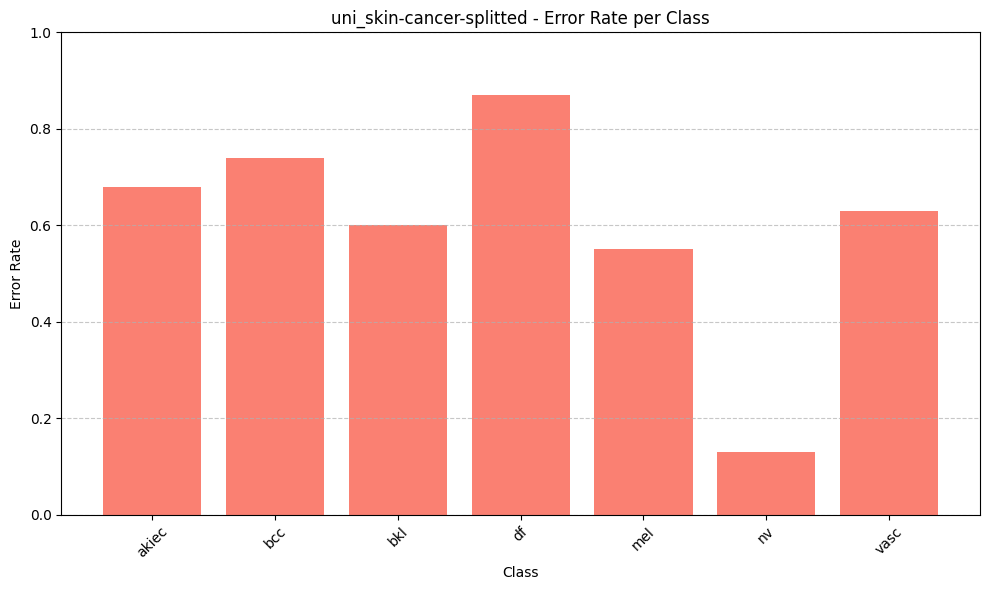

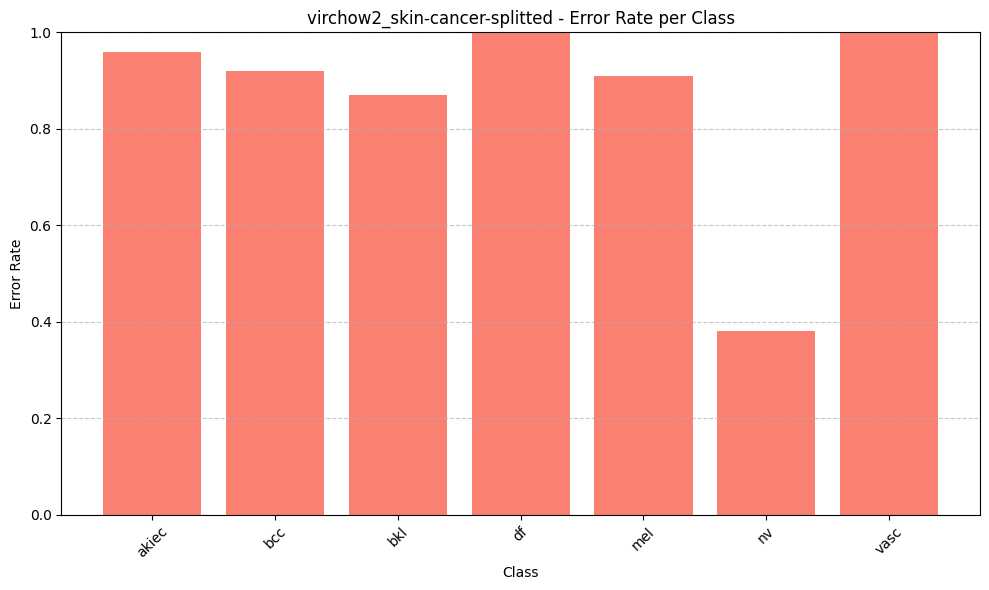

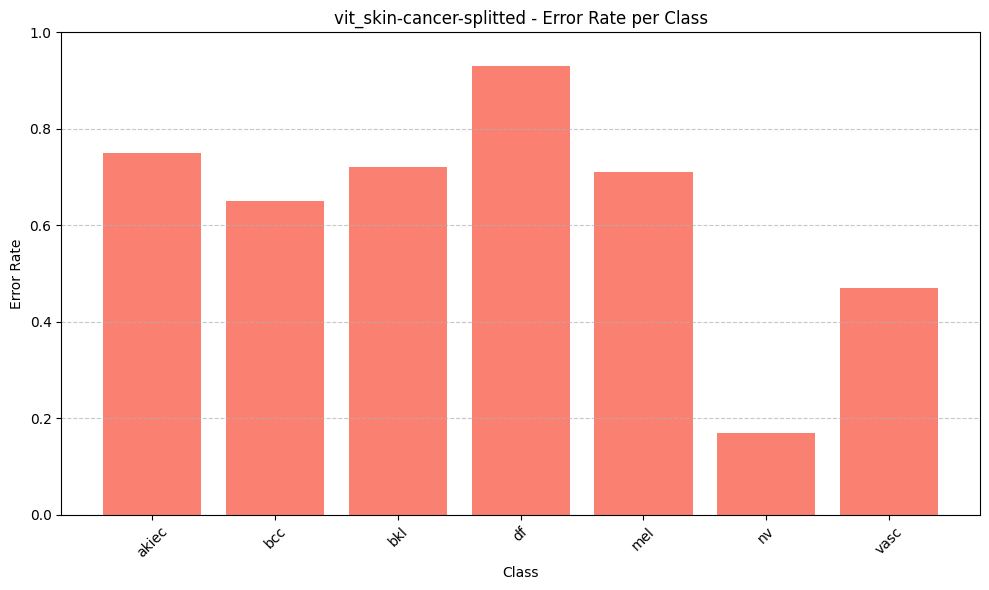

In [4]:
plot_class_performances(latest_experiments)

In [5]:

# Load map_at_k_query_details.json for each model in latest_experiments
models = {}
for model_name, model_info in latest_experiments.items():
    details_file = f"{model_info['path']}/{METRIC_FILES['map']['details']}"
    with open(details_file, "r") as f:
        models[model_name] = json.load(f)

# Dynamically assign models to variables for hypothesis testing
locals().update({f"model{i+1}": models[model_name] for i, model_name in enumerate(models.keys())})


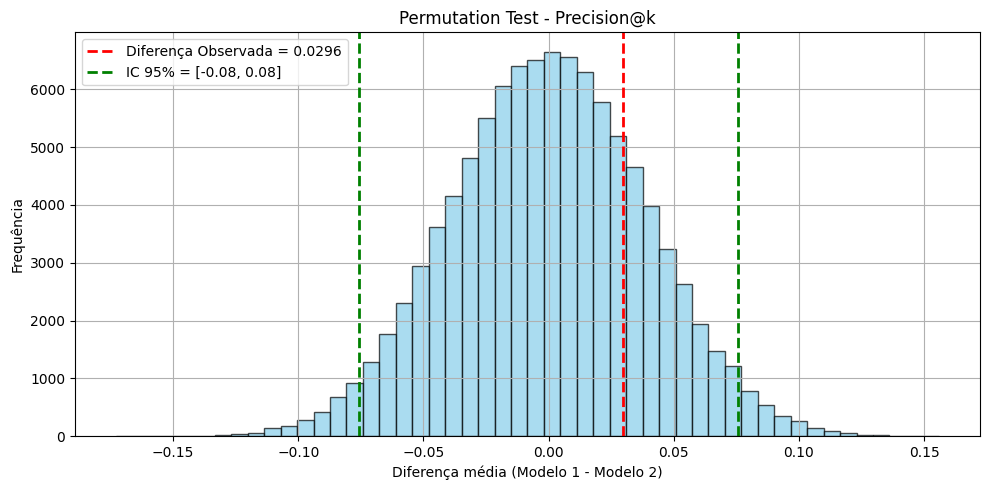

In [6]:
result = permutation_test(model1, model2, confidence=95, n_permutations=100_000, seed=42)
plot_permutation_test_distribution(result)

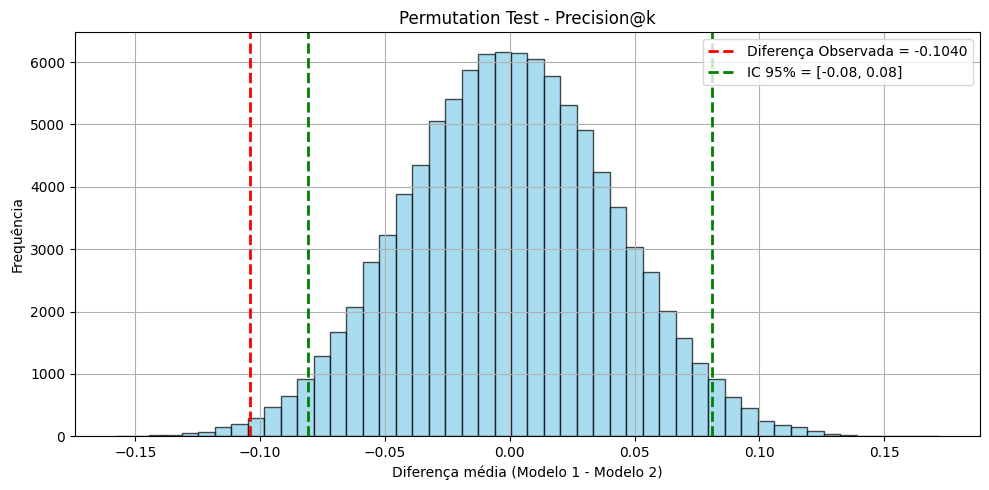

In [7]:
result = permutation_test(model1, model3, confidence=95, n_permutations=100_000, seed=42)
plot_permutation_test_distribution(result)

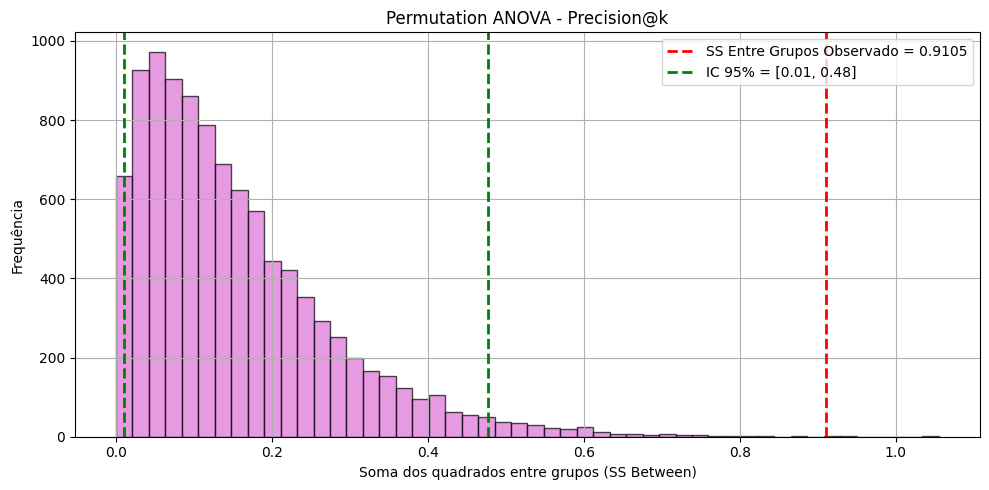

In [8]:
res = permutation_anova([model1, model2, model3, model4], n_permutations=10000, seed=42, confidence=95)
plot_permutation_anova_distribution(res)

In [4]:
latest_experiments

{'dino_fsl_skin-cancer-splitted': {'folder': 'dino_fsl_skin-cancer-splitted_2025-05-12_16-09-30',
  'timestamp': datetime.datetime(2025, 5, 12, 16, 9, 30),
  'path': '../local_experiments/skin-cancer-splitted/dino_fsl_skin-cancer-splitted_2025-05-12_16-09-30'},
 'dinov2_fsl_skin-cancer-splitted': {'folder': 'dinov2_fsl_skin-cancer-splitted_2025-05-13_11-43-10',
  'timestamp': datetime.datetime(2025, 5, 13, 11, 43, 10),
  'path': '../local_experiments/skin-cancer-splitted/dinov2_fsl_skin-cancer-splitted_2025-05-13_11-43-10'},
 'resnet_fsl_skin-cancer-splitted': {'folder': 'resnet_fsl_skin-cancer-splitted_2025-05-12_07-06-42',
  'timestamp': datetime.datetime(2025, 5, 12, 7, 6, 42),
  'path': '../local_experiments/skin-cancer-splitted/resnet_fsl_skin-cancer-splitted_2025-05-12_07-06-42'}}